In [1]:
import numpy as np
features=np.load("20features.npy")
features.shape

(200, 8620)

In [2]:
labels=np.hstack((np.zeros((100,),dtype=int),np.ones((100,),dtype=int)))
np.unique(labels)

array([0, 1])

In [3]:
import pandas as pd
data=pd.DataFrame({
    'MFCC 01st':features[:,0],
    'MFCC 02nd':features[:,1],
    'MFCC 03rd':features[:,2],
    'MFCC 04th':features[:,3],
    'MFCC 05th':features[:,4],
    'MFCC 06th':features[:,5],
    'MFCC 07th':features[:,6],
    'MFCC 08th':features[:,7],
    'MFCC 09th':features[:,8],
    'MFCC 10th':features[:,9],
    'MFCC 11th':features[:,10],
    'MFCC 12th':features[:,11],
    'MFCC 13th':features[:,12],
    'MFCC 14th':features[:,13],
    'MFCC 15th':features[:,14],
    'MFCC 16th':features[:,15],
    'MFCC 17th':features[:,16],
    'MFCC 18th':features[:,17],
    'MFCC 19th':features[:,18],
    'MFCC 20th':features[:,19],
    'labels':labels
})
data.head()

,MFCC 01st,MFCC 02nd,MFCC 03rd,MFCC 04th,MFCC 05th,MFCC 06th,MFCC 07th,MFCC 08th,MFCC 09th,MFCC 10th,...,MFCC 12th,MFCC 13th,MFCC 14th,MFCC 15th,MFCC 16th,MFCC 17th,MFCC 18th,MFCC 19th,MFCC 20th,labels
0,-719.062866,-707.583496,-633.472595,-519.299072,-440.028900,-417.755035,-418.441467,-409.892975,-377.025360,-349.318390,...,-360.215363,-424.559143,-495.244751,-555.213135,-603.899841,-644.993774,-668.989807,-688.994385,-709.829407,0
1,-746.140320,-742.428162,-742.304321,-746.918579,-744.613647,-498.149719,-381.052643,-332.644592,-334.006958,-387.857025,...,-479.386353,-515.735413,-562.370056,-607.714478,-651.594299,-674.291931,-691.078735,-701.285461,-708.947205,0
2,-702.527344,-705.717529,-708.727783,-711.868713,-709.698120,-518.834656,-266.183350,-150.312317,-95.043549,-99.228928,...,-192.161316,-171.135468,-183.937958,-273.578247,-399.974792,-400.204834,-234.682739,-138.878372,-112.082832,0
3,-619.012756,-619.695129,-619.368713,-555.803040,-336.223816,-201.740570,-148.235947,-161.838562,-199.892746,-216.353821,...,-242.832458,-238.937195,-246.901779,-280.371948,-332.892090,-397.484283,-426.858643,-439.663025,-474.095184,0
4,-242.206772,-201.749771,-193.979126,-219.345139,-243.740982,-245.470749,-245.910110,-267.652405,-310.442413,-376.471680,...,-508.116516,-558.660339,-610.861938,-643.409180,-660.644653,-671.300232,-677.038513,-678.079407,-682.020996,0


In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['MFCC 01st', 'MFCC 02nd','MFCC 03rd', 'MFCC 04th','MFCC 05th','MFCC 06th','MFCC 07th','MFCC 08th','MFCC 09th','MFCC 10th',
       'MFCC 11th','MFCC 12th','MFCC 13th','MFCC 14th','MFCC 15th','MFCC 16th','MFCC 17th','MFCC 18th','MFCC 19th','MFCC 20th']]  # Features
y=data['labels']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
from sklearn.svm import SVC
from sklearn import metrics

#Create the SVM model
clf = SVC(C=100, kernel = 'linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.52


In [7]:
import matplotlib.pyplot as plt
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

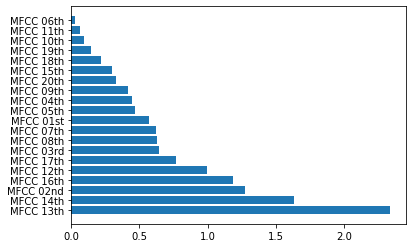

In [8]:
feature_names = ['MFCC 01st', 'MFCC 02nd','MFCC 03rd', 'MFCC 04th','MFCC 05th','MFCC 06th','MFCC 07th','MFCC 08th','MFCC 09th','MFCC 10th',
       'MFCC 11th','MFCC 12th','MFCC 13th','MFCC 14th','MFCC 15th','MFCC 16th','MFCC 17th','MFCC 18th','MFCC 19th','MFCC 20th']

f_importances(abs(clf.coef_[0]), feature_names, top=20)

In [10]:
from sklearn.model_selection import train_test_split

#Remove the lowest 5 labels from MFCC 10th to 15th
X=data[['MFCC 01st', 'MFCC 02nd', 'MFCC 03rd', 'MFCC 04th','MFCC 05th','MFCC 07th','MFCC 08th','MFCC 09th', 
        'MFCC 12th', 'MFCC 13th', 'MFCC 14th', 'MFCC 15th','MFCC 16th','MFCC 17th','MFCC 20th']]  # Features
y=data['labels']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf = SVC(C=100, kernel = 'linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.58
